In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from io import StringIO
from sklearn.model_selection import train_test_split

In [72]:
speed = 400
tau = 20

In [73]:
file_name = f"../workspace/data/u{tau}/onehalf/data{speed}0000.csv"

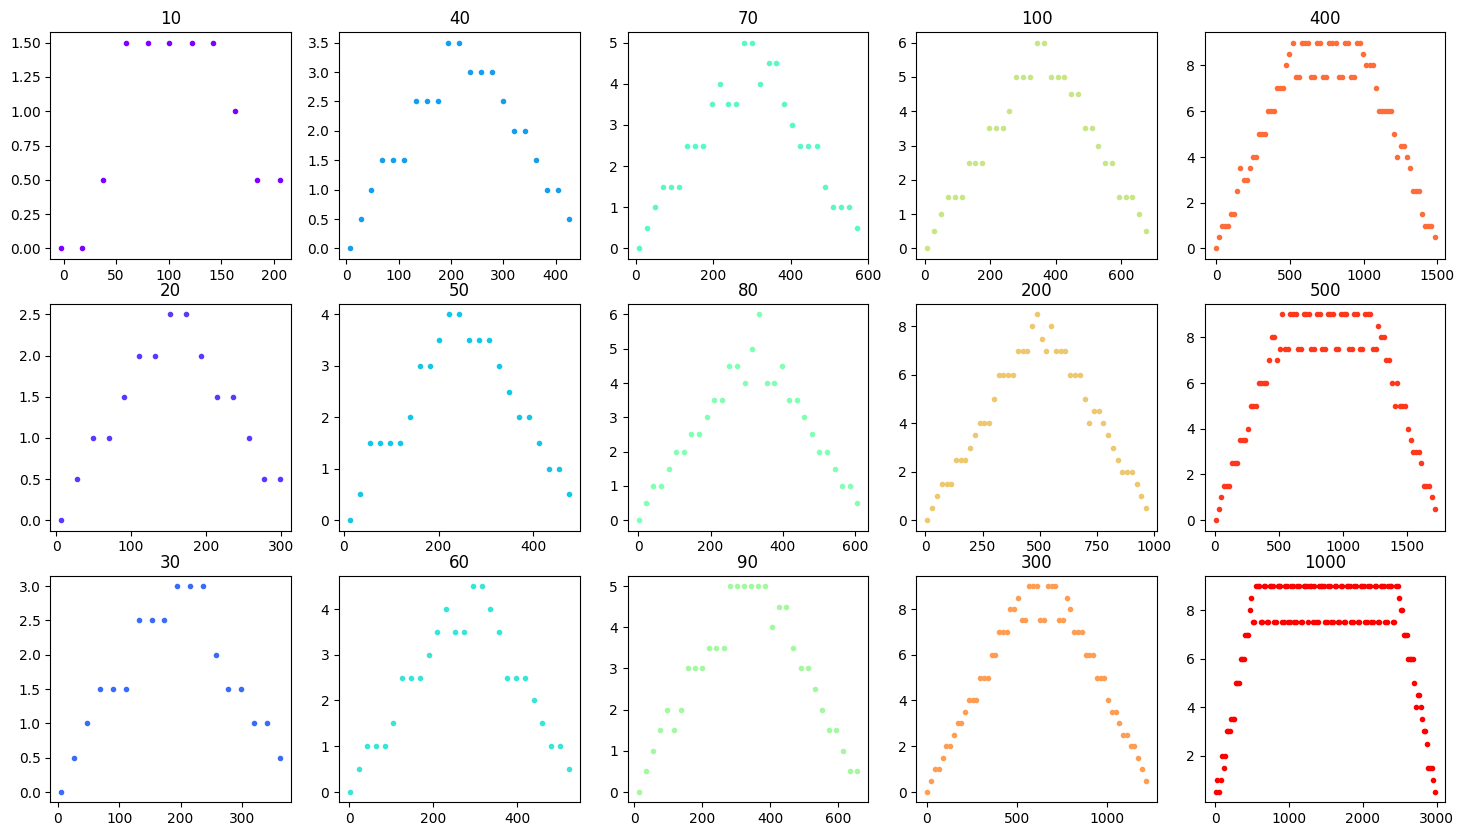

In [74]:
with open(file_name, "r") as f:
    data = f.read()

split_data = data.split("\n\n")[:-1]
# print(split_data[0])

color = cm.rainbow(np.linspace(0, 1, len(split_data)))

targets = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000]
fig, ax = plt.subplots(
    nrows=3, ncols=len(targets) // 3, num=file_name, figsize=(18, 10)
)
dfs = []
for i, split in enumerate(split_data):
    df = pd.read_csv(StringIO(split), sep=",", header=None)
    times = df[0].to_numpy()
    locations = df[1].to_numpy()
    speeds = [y - x for x, y in zip(locations, locations[1:])]
    speeds = [(x + y) / 2 for x, y in zip(speeds + [0], [0] + speeds)]
    # speeds += [0]
    df[2] = speeds
    accelerations = [y - x for x, y in zip(speeds, speeds[1:])]
    accelerations = [
        (x + y) / 2 for x, y in zip(accelerations + [0], [0] + accelerations)
    ]
    # accelerations += [0]
    df[3] = accelerations
    # ax[i % 3][i // 3].scatter(times, locations, c=[color[i]], marker='.')
    ax[i % 3][i // 3].scatter(times, speeds, c=[color[i]], marker=".")
    ax[i % 3][i // 3].set_title(targets[i])
    dfs.append(df)
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
idx = -2
df = dfs[idx]

In [77]:
df[0] = df[0] - df[0][0]

In [78]:
yt = df[2]
Xt = df[0]

In [ ]:
yt

In [80]:
consider_till = yt.argmax() + 1
consider_till

26

In [81]:
X1 = np.array(Xt[:consider_till]).reshape(-1, 1)
y1 = np.array(yt[:consider_till]).reshape(-1, 1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1)

In [83]:
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9480682279648847


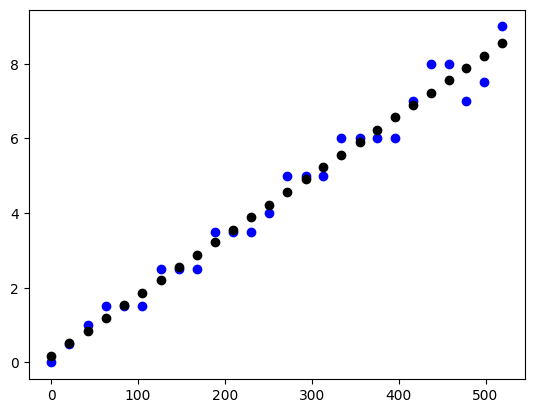

In [84]:
y_pred = regr.predict(X1)
plt.scatter(X1, y1, color="b")
plt.scatter(X1, y_pred, color="k")

plt.show()

In [85]:
regr.coef_, regr.intercept_

(array([[0.01614243]]), array([0.17616937]))

In [ ]:
m1 = []
b1 = []
for i in range(len(dfs)):
    df = dfs[i]
    df[0] = df[0] - df[0][0]
    y_ = df[2]
    X_ = df[0]
    consider_till = y_[::-1].argmax() + 1
    X1_ = np.array(X_[:consider_till]).reshape(-1, 1)
    y1_ = np.array(y_[:consider_till]).reshape(-1, 1)
    # X_train, X_test, y_train, y_test = train_test_split(X1_, y1_, test_size = 0.1)
    regr_ = LinearRegression()
    regr_.fit(X1_, y1_)
    print(regr_.score(X1_, y1_))
    m1.append(regr_.coef_[0])
    b1.append(regr_.intercept_[0])

In [ ]:
m1

In [88]:
np.var(m1), np.mean(m1), np.var(b1), np.mean(b1)

(4.747687010522591e-06,
 0.01677242719201212,
 0.015957245453093103,
 0.1182519766173629)

In [89]:
consider_from = len(yt) - yt[::-1].argmax() - 1
consider_from

58

In [90]:
X2 = np.array(Xt[consider_from:]).reshape(-1, 1)
y2 = np.array(yt[consider_from:]).reshape(-1, 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [92]:
regr2 = LinearRegression()

regr2.fit(X_train, y_train)
print(regr2.score(X_test, y_test))

0.8895897872574383


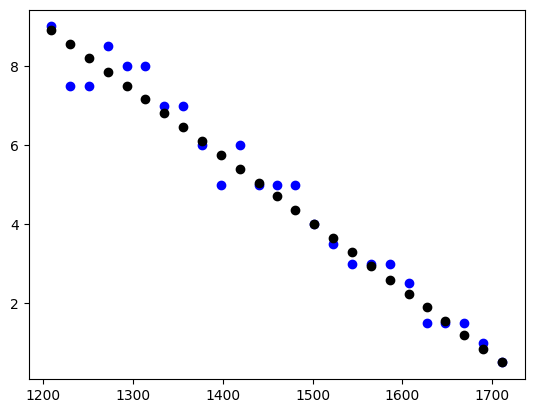

In [93]:
y_pred = regr2.predict(X2)
plt.scatter(X2, y2, color="b")
plt.scatter(X2, y_pred, color="k")

plt.show()

In [94]:
regr2.coef_, regr2.intercept_

(array([[-0.01675598]]), array([29.17049513]))

In [ ]:
m2 = []
b2 = []
for i in range(len(dfs)):
    df = dfs[i]
    df[0] = df[0] - df[0][0]
    y_ = df[2]
    X_ = df[0]
    consider_from = len(y_) - y_[::-1].argmax() + 1
    X2_ = np.array(X_[consider_from:]).reshape(-1, 1)
    y2_ = np.array(y_[consider_from:]).reshape(-1, 1)
    # X_train, X_test, y_train, y_test = train_test_split(X2_, y2_, test_size = 0.2)
    regr_ = LinearRegression()
    regr_.fit(X2_, y2_)
    print(regr_.score(X2_, y2_))
    m2.append(regr_.coef_[0])
    b2.append(regr_.intercept_[0])

In [ ]:
b2

In [97]:
np.var(m2), np.mean(m2)

(1.878672521228496e-05, -0.015234230888136939)

In [98]:
np.mean(m1), np.mean(m2)

(0.01677242719201212, -0.015234230888136939)

In [99]:
m1 = np.mean(m1)
m2 = np.mean(m2)

In [100]:
regr2.coef_

array([[-0.01675598]])

In [ ]:
y1

In [102]:
# m1 = 0.015898235185335192
# m2 = -0.015130770105314221

In [ ]:
(np.round(m1 * X1 * 2) / 2)

In [104]:
slope_count_pred = (np.round(m1 * X1 * 2) / 2).sum() * 2
slope_count_real = y2.sum() + y1.sum()
slope_count_pred, slope_count_real

(227.0, 233.0)

In [105]:
flat_remaining_count = targets[idx] - slope_count_pred

In [106]:
s = tau * speed / 1000
flat_time = round(flat_remaining_count / s)
flat_time, s, flat_remaining_count % s

(34, 8.0, 1.0)

In [107]:
yt.sum(), flat_time * s + slope_count_pred

(500.0, 499.0)

Now note that X1 won't be available to us, so we can use the fact that slope of speed
is constant until it saturates

In [108]:
till = (
    s + 0.5
) / m1  # allow top speed to saturate above by 0.5 for 400 pulses per second u20 observation
till

506.7841346211436

In [109]:
X1new = np.arange(0, int(till), tau)
slope_time = len(X1new)
X1new

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500])

In [110]:
np.round(m1 * X1new * 2) / 2

array([0. , 0.5, 0.5, 1. , 1.5, 1.5, 2. , 2.5, 2.5, 3. , 3.5, 3.5, 4. ,
       4.5, 4.5, 5. , 5.5, 5.5, 6. , 6.5, 6.5, 7. , 7.5, 7.5, 8. , 8.5])

In [111]:
y1pred = m1 * X1new
slope_count_pred = y1pred.sum() * 2
slope_count_pred, slope_count_real

(218.04155349615758, 233.0)

In [112]:
flat_remaining_count = targets[idx] - slope_count_pred
flat_time = round(flat_remaining_count / s)
flat_time

35

In [113]:
yt.sum(), flat_time * s + slope_count_pred

(500.0, 498.0415534961576)

Generate times and their predictions

In [114]:
X3new = np.arange(X1new[-1] + tau, X1new[-1] + (flat_time) * tau + 1, tau)
assert len(X3new) == flat_time

In [115]:
X3new

array([ 520,  540,  560,  580,  600,  620,  640,  660,  680,  700,  720,
        740,  760,  780,  800,  820,  840,  860,  880,  900,  920,  940,
        960,  980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160,
       1180, 1200])

In [116]:
X2new = np.arange(X3new[-1] + tau, X3new[-1] + (slope_time) * tau + 1, tau)
assert len(X2new) == slope_time

In [117]:
X2new

array([1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420,
       1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640,
       1660, 1680, 1700, 1720])

In [118]:
Xnew = np.concatenate([X1new, X3new, X2new])

In [119]:
b = -((X2new[-1]) * m2)
b, b2[idx]

(26.202877127595535, 29.973846107384343)

In [120]:
y2pred = (m2 * X2new + b)

In [121]:
y3pred = np.array([s] * flat_time)

In [122]:
ypred = np.concatenate([y1pred, y3pred, y2pred])

In [123]:
ypred.sum(), yt.sum(), len(ypred), len(yt)

(488.0432775209689, 500.0, 87, 83)

In [ ]:
ypred

In [ ]:
np.array(yt)

In [ ]:
ypred

In [127]:
n = len(ypred)

In [ ]:
transform = -0.5 * np.roll(np.eye(n), 2).T + 0.5 * np.eye(n)
transform[0][0] = 1
transform[0][-1] = 0
transform

In [129]:
inv_transform = np.linalg.inv(transform)

In [130]:
ypred = np.concatenate([[0], ypred[:-1]])

In [131]:
ypred = inv_transform @ ypred

In [ ]:
ypred

In [ ]:
Xnew

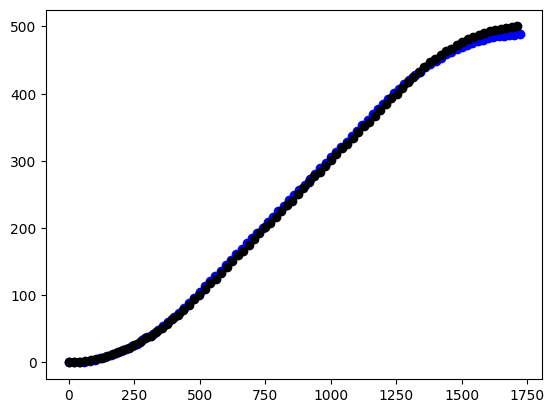

In [133]:
plt.scatter(Xnew, ypred, color="b")
plt.scatter(dfs[idx][0], dfs[idx][1], color="k")
# plt.scatter(Xt, yt, color="k")

plt.show()